In [1]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib as mpl
import corner
import seaborn.apionly as sns
from tqdm import tqdm
import pandas as pd
%matplotlib inline

/Users/bcook/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set_context('poster')
sns.set_style('ticks')

In [3]:
df_full = pd.read_csv('results/chain_full.csv')
df_ssp = pd.read_csv('results/chain_SSP.csv')
df_full.head()

,logz,logdust,logSFH0,logSFH1,logSFH2,logSFH3,logSFH4,logSFH5,logSFH6,lnprob,N_walkers
0,-0.0877,-1.9697,1.1620,1.1622,1.0127,1.3069,1.1258,1.1416,1.1376,-1862.1951,128
1,-0.0877,-1.9697,1.1620,1.1622,1.0127,1.3069,1.1258,1.1416,1.1376,-1862.1951,128
2,-0.1084,-1.9412,1.1734,1.1873,1.0133,1.2264,1.1917,1.1819,1.1406,-1813.4939,128
3,-0.1084,-1.9412,1.1734,1.1873,1.0133,1.2264,1.1917,1.1819,1.1406,-1813.4939,128
4,-0.0753,-1.8902,1.1768,1.1908,0.9715,1.2562,1.2002,1.1845,1.1465,-1686.0267,128


In [4]:
df_ssp.head()

,logz,logdust,logNpix,logage,lnprob,N_walkers
0,-0.1303,-1.9311,2.0026,9.6136,-4456.7238,128
1,-0.1303,-1.9311,2.0026,9.6136,-4456.7238,128
2,-0.1699,-1.9429,2.0130,9.5987,-1113.0437,128
3,-0.1699,-1.9429,2.0130,9.5987,-1113.0437,128
4,-0.1699,-1.9429,2.0130,9.5987,-1113.0437,128


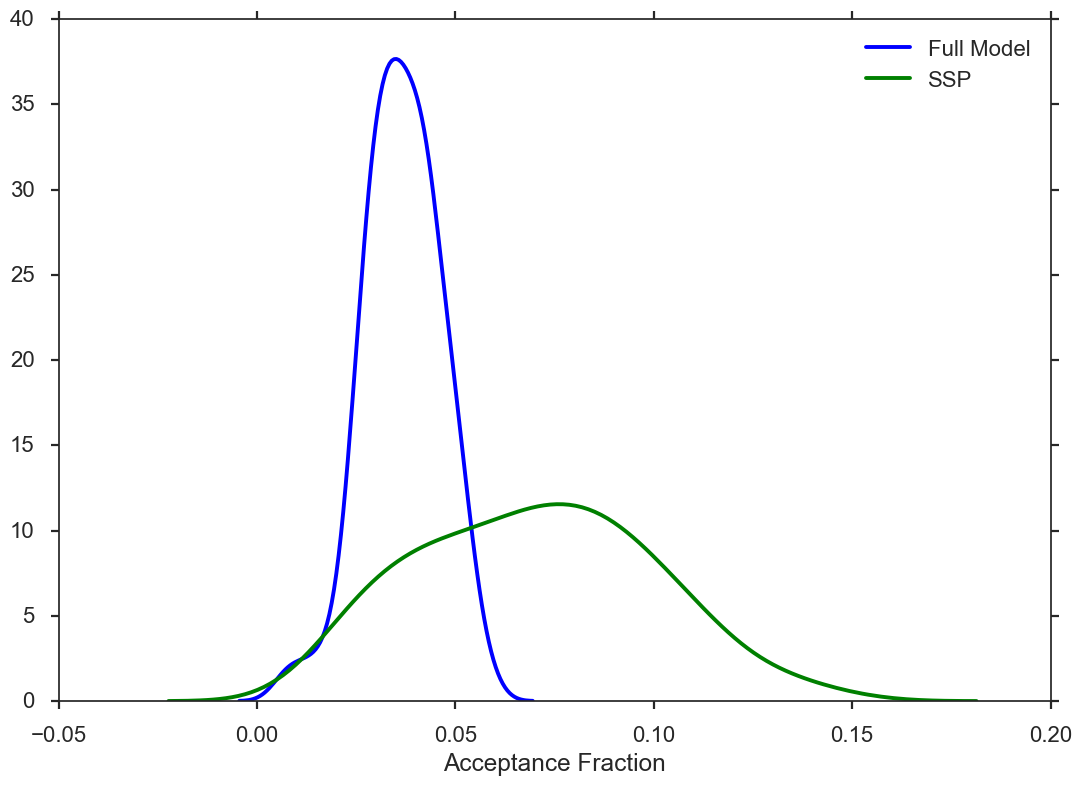

In [5]:
accept_full = pd.read_csv('results/accept_full.csv').acceptance.values
accept_ssp = pd.read_csv('results/accept_ssp.csv').acceptance.values
ax = sns.kdeplot(accept_full, label='Full Model')
sns.kdeplot(accept_ssp, label='SSP', ax=ax)
ax.set_xlabel('Acceptance Fraction')

In [6]:
logSFH = df_full[['logSFH0', 'logSFH1', 'logSFH2', 'logSFH3', 'logSFH4', 'logSFH5', 'logSFH6']].values
logNpix = np.log10(np.sum(10.**logSFH, axis=1))
df_full['logNpix']= logNpix

In [7]:
lSFH = np.log10(1e2 / 7.)
SFH_true = np.ones(7)*10.**lSFH
truths_full = np.array([-0.2, -2., lSFH, lSFH, lSFH, lSFH, lSFH, lSFH, lSFH, -np.inf, 2.])
truths_ssp = np.array([-0.2, -2., 2., 9.6, -np.inf])

In [8]:
df_full.drop('N_walkers', axis=1).head()

,logz,logdust,logSFH0,logSFH1,logSFH2,logSFH3,logSFH4,logSFH5,logSFH6,lnprob,logNpix
0,-0.0877,-1.9697,1.1620,1.1622,1.0127,1.3069,1.1258,1.1416,1.1376,-1862.1951,2.002426
1,-0.0877,-1.9697,1.1620,1.1622,1.0127,1.3069,1.1258,1.1416,1.1376,-1862.1951,2.002426
2,-0.1084,-1.9412,1.1734,1.1873,1.0133,1.2264,1.1917,1.1819,1.1406,-1813.4939,2.008713
3,-0.1084,-1.9412,1.1734,1.1873,1.0133,1.2264,1.1917,1.1819,1.1406,-1813.4939,2.008713
4,-0.0753,-1.8902,1.1768,1.1908,0.9715,1.2562,1.2002,1.1845,1.1465,-1686.0267,2.013284


In [19]:
def chain_plot(df, truths=None, axes=None):
    nwalkers = df.N_walkers.values[0]
    df_temp = df.drop('N_walkers', axis=1)
    cols = df_temp.columns
    nrows = len(cols)
    if axes is None:
        fig, axes = plt.subplots(nrows=nrows, figsize=(8,1.5*nrows), sharex=True)
    nsteps = len(df_temp) / nwalkers
    chains = df_temp.values.reshape((nwalkers, nsteps, nrows))
    for c, col in enumerate(cols):
        for w in range(nwalkers):
            axes[c].plot(np.arange(nsteps), chains[w,:,c], 'k-', alpha=0.5, lw=1.)
        if truths is not None:
            axes[c].axhline(y=truths[c], ls='--', color='r')
        axes[c].set_ylabel(col)
    axes[-1].set_xlabel('Iterations')
    return axes

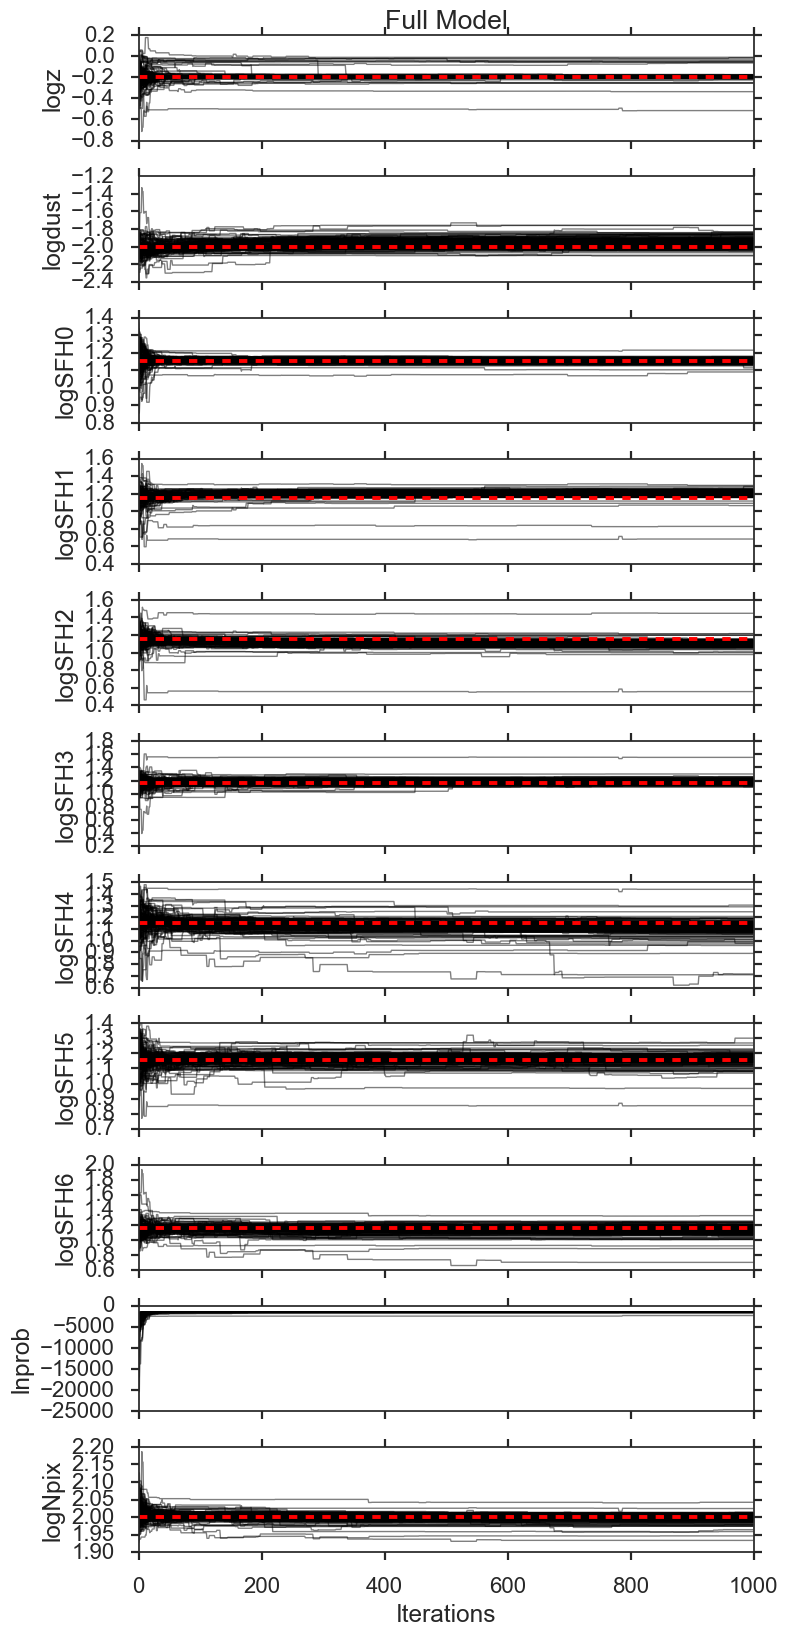

In [22]:
axes = chain_plot(df_full, truths_full)
axes[0].set_title('Full Model')
plt.tight_layout()
plt.savefig('figures/full_model_chain.pdf')

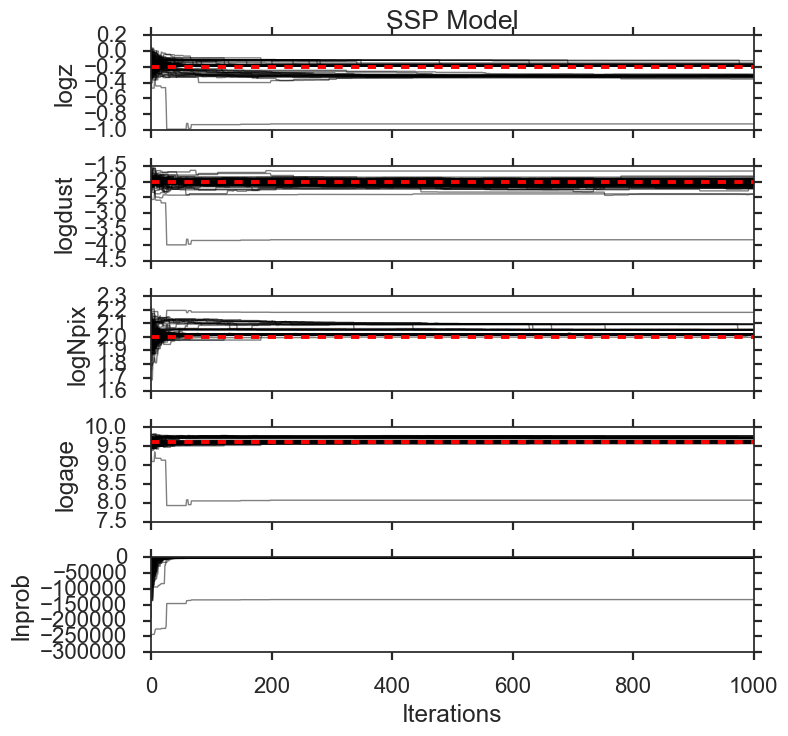

In [23]:
axes = chain_plot(df_ssp, truths_ssp)
axes[0].set_title('SSP Model')
plt.tight_layout()
plt.savefig('figures/SSP_model_chain.pdf')

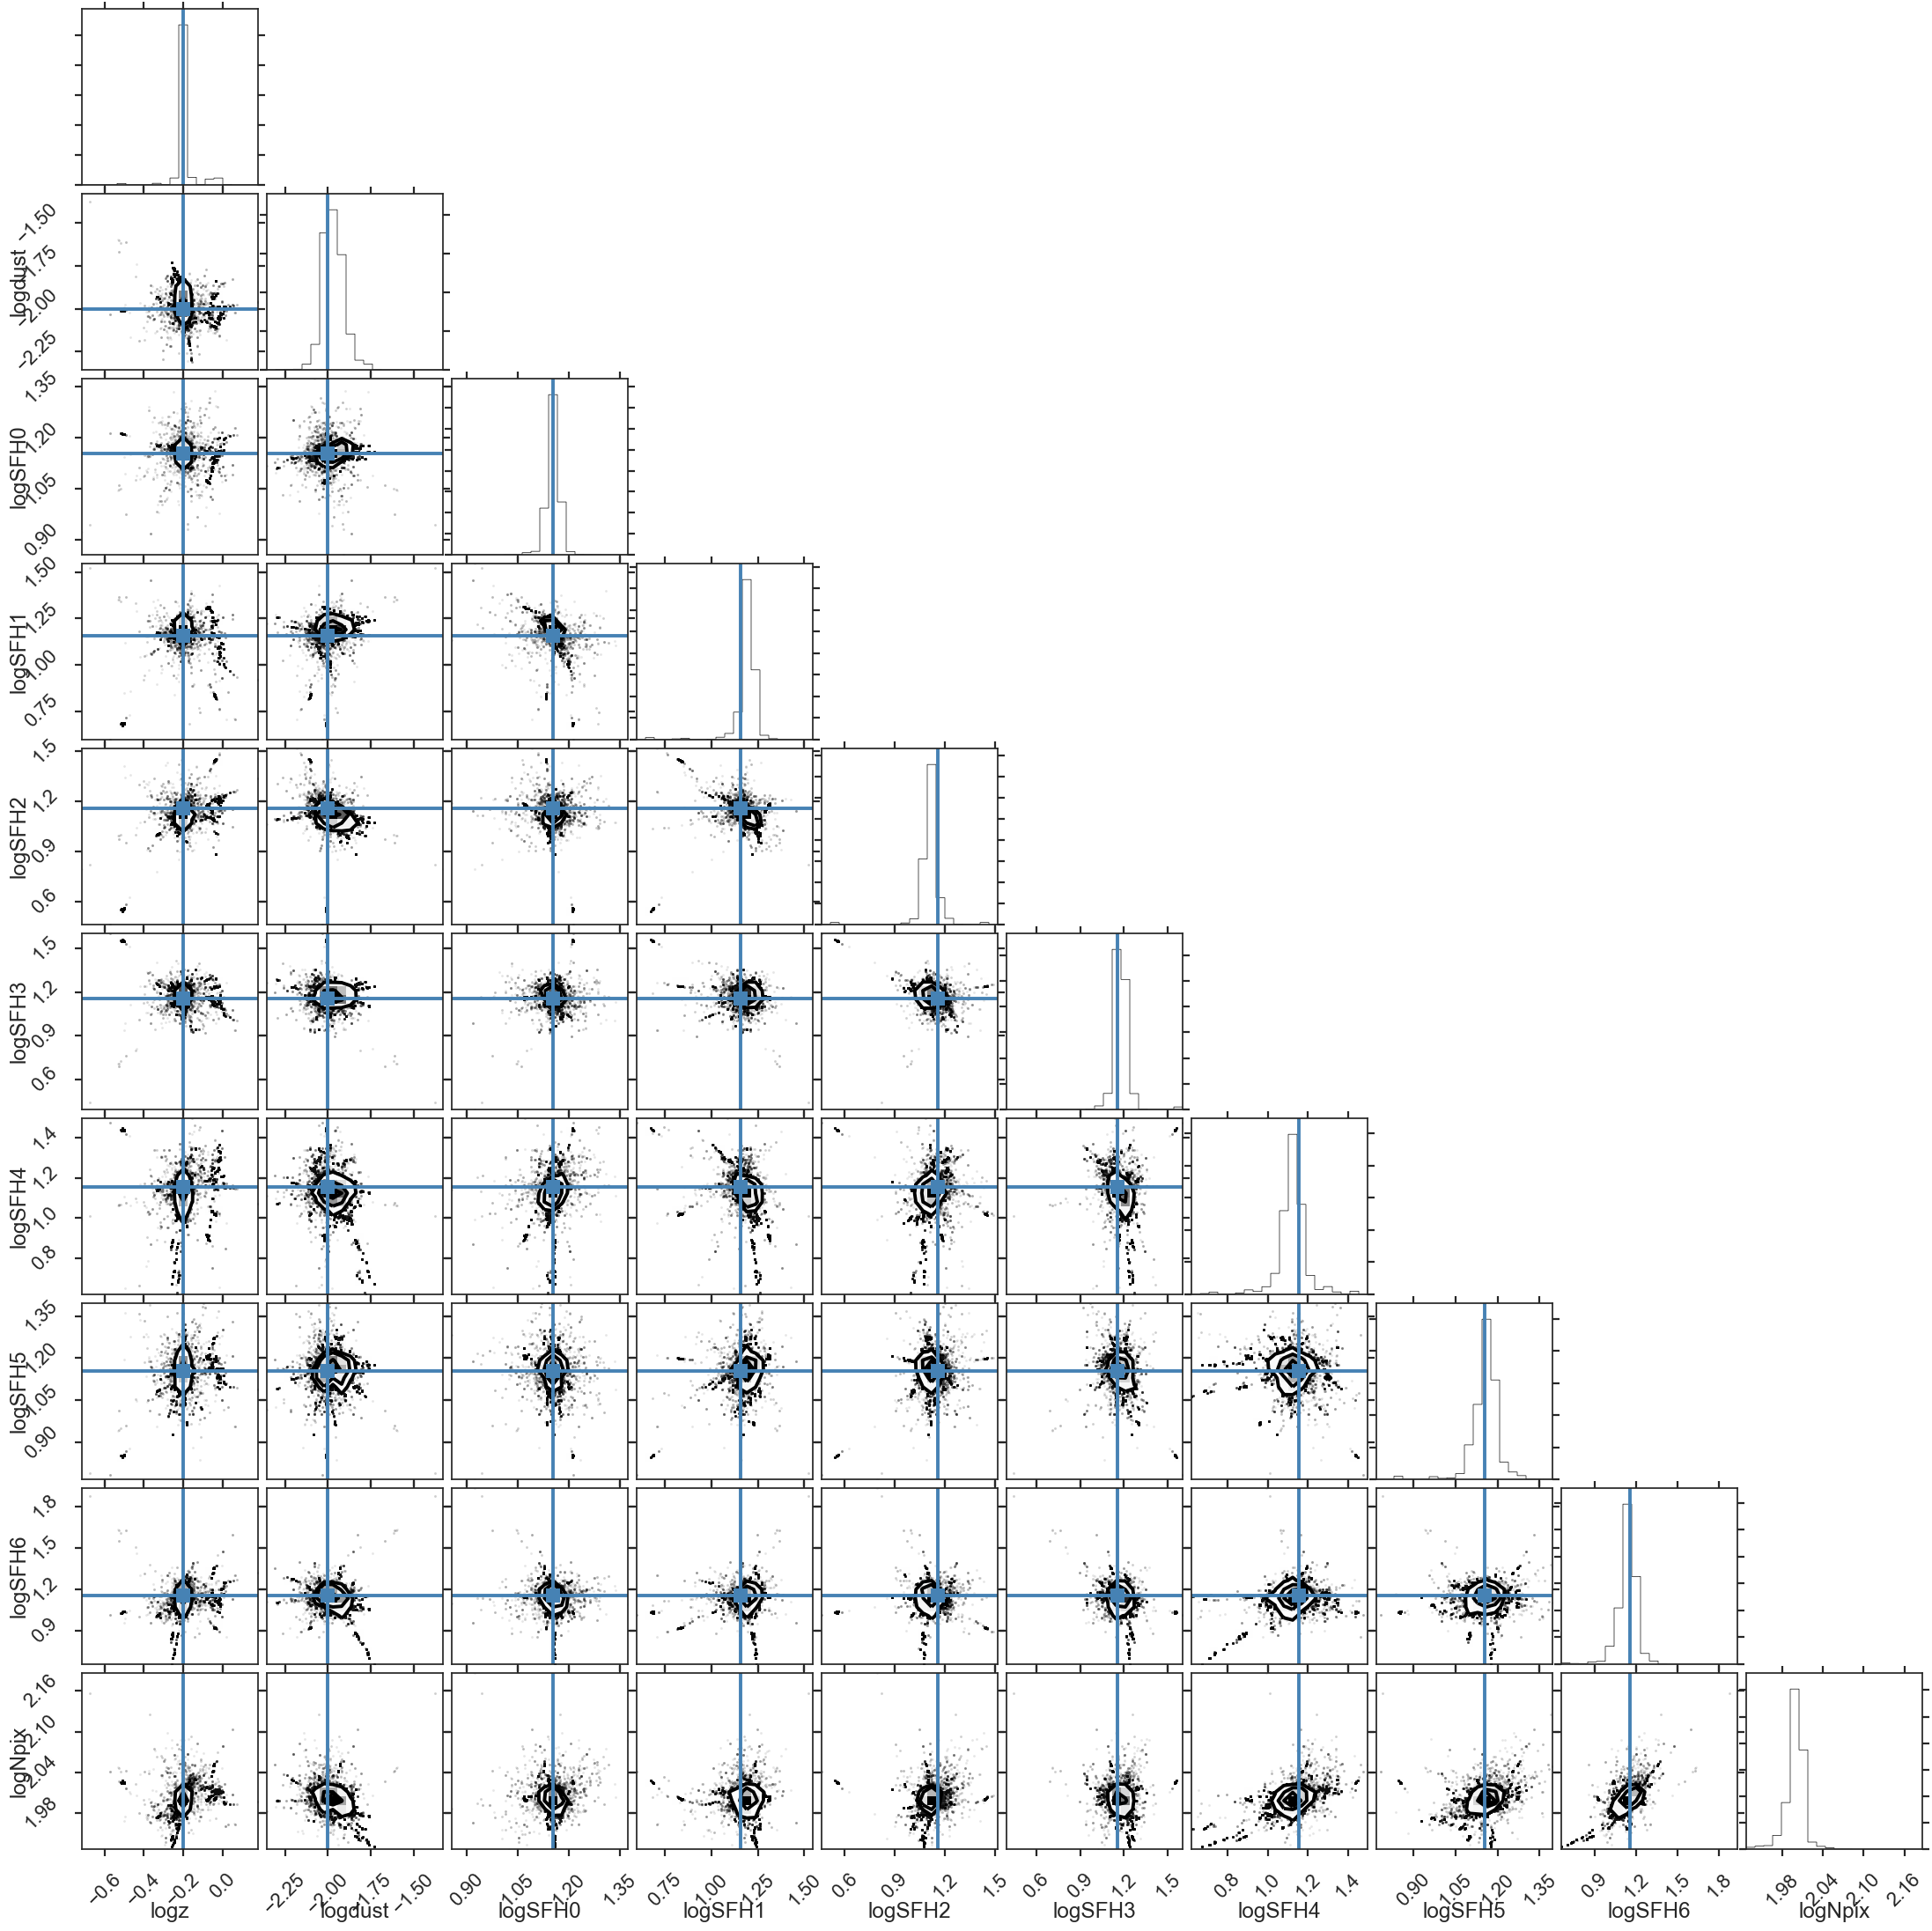

In [29]:
a = corner.corner(df_full.drop(['N_walkers', 'lnprob'], axis=1), truths=truths_full)
plt.savefig('figures/full_model_corner.pdf')

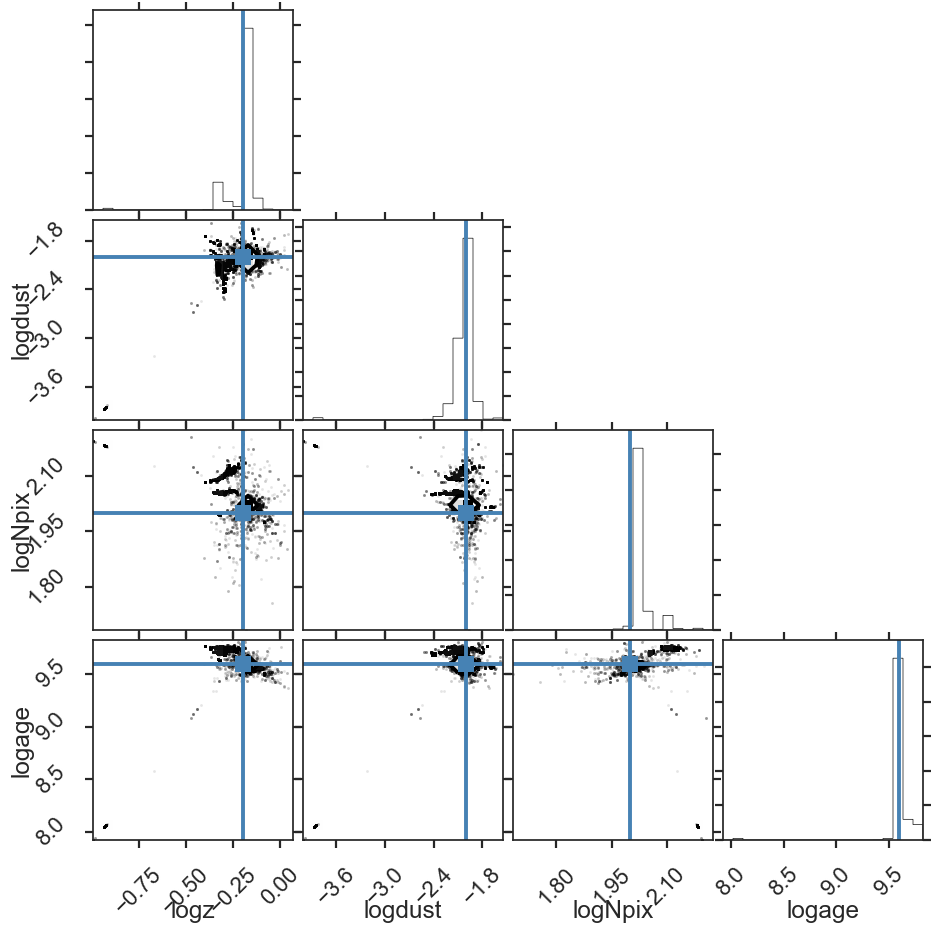

In [25]:
a = corner.corner(df_ssp.drop(['N_walkers', 'lnprob'], axis=1), truths=truths_ssp)
plt.savefig('figures/SSP_model_corner.pdf')

In [14]:
SFH = 10.**logSFH
cum_mcmc = SFH.cumsum(axis=1) / 100.
cum_means = np.mean(cum_mcmc, axis=0)
cum_stds = np.std(cum_mcmc, axis=0)
cum_true = SFH_true.cumsum() / 100.
log_ages = np.array([6.5, 7.5, 8.25, 8.75, 9.25, 9.75, 10.1])

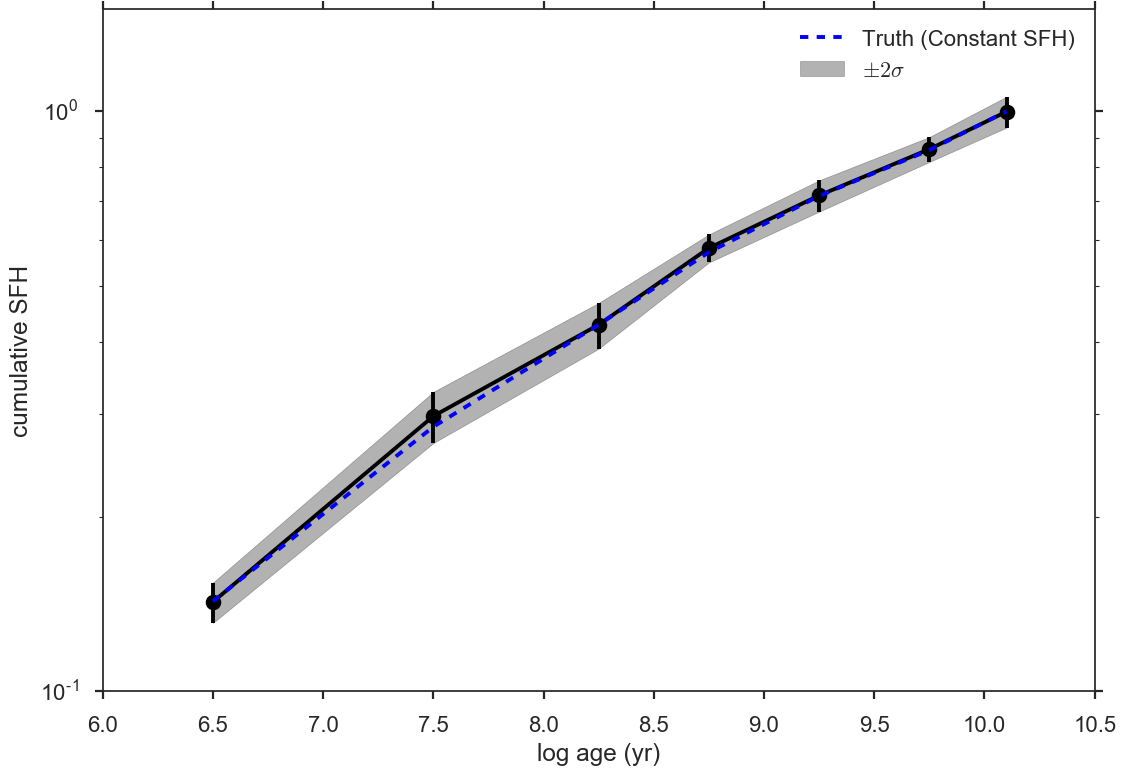

In [26]:
fig, axis = plt.subplots()
axis.fill_between(log_ages, cum_means-2.*cum_stds, y2=(cum_means + 2.*cum_stds), color='k', alpha=0.3, label=r'$\pm 2\sigma$')
axis.errorbar(log_ages, cum_means, yerr=2.*cum_stds, c='k', marker='o')
axis.plot(log_ages, cum_true, ls='--', label='Truth (Constant SFH)')
axis.set_xlabel('log age (yr)')
axis.set_ylabel('cumulative SFH')
axis.set_yscale('log')
axis.set_ylim(ymax=1.5), axis.set_xlim(xmin=6.)
axis.legend(loc=0)
plt.savefig('figures/full_model_SFH.pdf')